In [1]:

import pandas as pd 
import numpy as np 

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# Large dataset
import dask.bag as db

In [2]:
whatsappData = pd.read_csv("whatsappgoogle_play_store.csv")
whatsappData.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,be6a53e4-9b9e-4ae6-86ea-50b2d8096608,Charles Ojegbulu,https://play-lh.googleusercontent.com/a/AItbvm...,Awesome,5,0,2.22.13.76,8/2/2022 17:00,NaN,NaN
1,eb61677d-f0ab-4f65-84ea-898e745930e7,Linet Kendi,https://play-lh.googleusercontent.com/a/AItbvm...,It was the best,5,0,2.22.3.77,8/2/2022 17:00,NaN,NaN
2,7a73726f-e86f-4026-8afc-f6afb73874bc,Veronica James,https://play-lh.googleusercontent.com/a/AItbvm...,Is so beautiful whatsapp,5,0,2.22.9.78,8/2/2022 17:00,NaN,NaN
3,33ccef53-d635-4dcf-8613-1c06971e95d0,Ggbeko Shigmah,https://play-lh.googleusercontent.com/a/AItbvm...,It really helpful and fast,5,0,NaN,8/2/2022 17:00,NaN,NaN
4,93566307-5fa6-4a39-9fd5-b0f3aa87e9ac,Rudra Awasthi,https://play-lh.googleusercontent.com/a/AItbvm...,Very useful for us no another words,5,0,2.22.15.74,8/2/2022 17:00,NaN,NaN


In [3]:
whatsappData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804756 entries, 0 to 804755
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   reviewId              804752 non-null  object 
 1   userName              804756 non-null  object 
 2   userImage             804756 non-null  object 
 3   content               804714 non-null  object 
 4   score                 804756 non-null  int64  
 5   thumbsUpCount         804756 non-null  int64  
 6   reviewCreatedVersion  661675 non-null  object 
 7   at                    804756 non-null  object 
 8   replyContent          0 non-null       float64
 9   repliedAt             0 non-null       float64
dtypes: float64(2), int64(2), object(6)
memory usage: 61.4+ MB


In [4]:
whatsappData.shape

(804756, 10)

In [5]:
##########################################
## CHECKING FOR MISSING VALUES
##########################################

whatsappData.isnull().sum()

reviewId                     4
userName                     0
userImage                    0
content                     42
score                        0
thumbsUpCount                0
reviewCreatedVersion    143081
at                           0
replyContent            804756
repliedAt               804756
dtype: int64

In [6]:
###########################
## DROP IRRELAVENT COLUMNS
###########################

whatsappData.drop(columns=["reviewId","userImage","replyContent","repliedAt"], inplace = True)
whatsappData.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at
0,Charles Ojegbulu,Awesome,5,0,2.22.13.76,8/2/2022 17:00
1,Linet Kendi,It was the best,5,0,2.22.3.77,8/2/2022 17:00
2,Veronica James,Is so beautiful whatsapp,5,0,2.22.9.78,8/2/2022 17:00
3,Ggbeko Shigmah,It really helpful and fast,5,0,NaN,8/2/2022 17:00
4,Rudra Awasthi,Very useful for us no another words,5,0,2.22.15.74,8/2/2022 17:00


Text(0, 0.5, 'Number of Reviews')

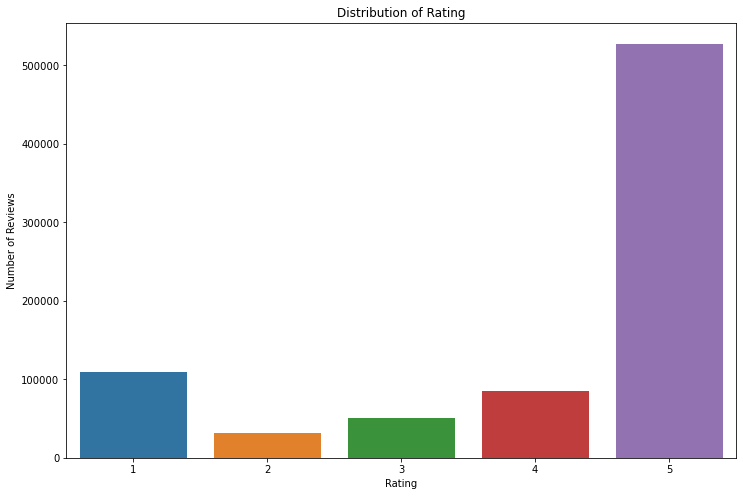

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(whatsappData.score)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

In [8]:
whatsappData.dropna(subset=['content'], inplace =True)
whatsappData.isnull().sum()

userName                     0
content                      0
score                        0
thumbsUpCount                0
reviewCreatedVersion    143080
at                           0
dtype: int64

we will ignore empty rows of reviewCreatedVersion column for now

In [11]:
##########################################
## Classify rating scores as good or bad 
##########################################

good_rate = len(whatsappData[whatsappData['score'] >= 3])
bad_rate = len(whatsappData[whatsappData['score'] < 3])

# Printing rates and their total numbers
print ('Good ratings : {} reviews for Whatsapp App'.format(good_rate))
print ('Bad ratings : {} reviews for Whatsapp App'.format(bad_rate))

whatsappData['rating_class'] = whatsappData['score'].apply(lambda x: 'bad' if x < 3 else'good')
whatsappData.head()


Good ratings : 663983 reviews for Whatsapp App
Bad ratings : 140731 reviews for Whatsapp App


,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,rating_class
0,Charles Ojegbulu,Awesome,5,0,2.22.13.76,8/2/2022 17:00,good
1,Linet Kendi,It was the best,5,0,2.22.3.77,8/2/2022 17:00,good
2,Veronica James,Is so beautiful whatsapp,5,0,2.22.9.78,8/2/2022 17:00,good
3,Ggbeko Shigmah,It really helpful and fast,5,0,NaN,8/2/2022 17:00,good
4,Rudra Awasthi,Very useful for us no another words,5,0,2.22.15.74,8/2/2022 17:00,good


In [12]:
##########################################
## Top 10 thumbsUpCount for comments
##########################################

sorted(whatsappData.thumbsUpCount.unique(),reverse = True)[:10]

[146854, 79912, 68461, 65616, 63578, 54466, 45086, 43406, 40315, 40023]

In [13]:
##########################################
# checking duplicates based on'userName', 'content' and 'at'columns
##########################################

whatsappData[whatsappData.duplicated(['userName', 'content','at'],keep= False)]

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,rating_class
457746,A Google user,Good,5,0,2.22.10.73,5/26/2022 13:29,good
457749,A Google user,Good,4,0,2.22.10.73,5/26/2022 13:29,good


In [14]:
##########################################
## DESCRIPTIVE STATISTICS
##########################################

print ("================================================")

### Total reviews
total = len(whatsappData)
print ("Number of reviews: ",total)
print ()

### How many unique reviewers?
print ("Number of unique reviewers: ",len(whatsappData.userName.unique()))
reviewer_prop = float(len(whatsappData.userName.unique())/total)
print ("Prop of unique reviewers: ",round(reviewer_prop,3))
print ()

### Average star score
print ("Average rating score: ",round(whatsappData.score.mean(),3))

print ("================================================")

Number of reviews:  804714

Number of unique reviewers:  697501
Prop of unique reviewers:  0.867

Average rating score:  4.107


Text(0, 0.5, 'Number of Reviews')

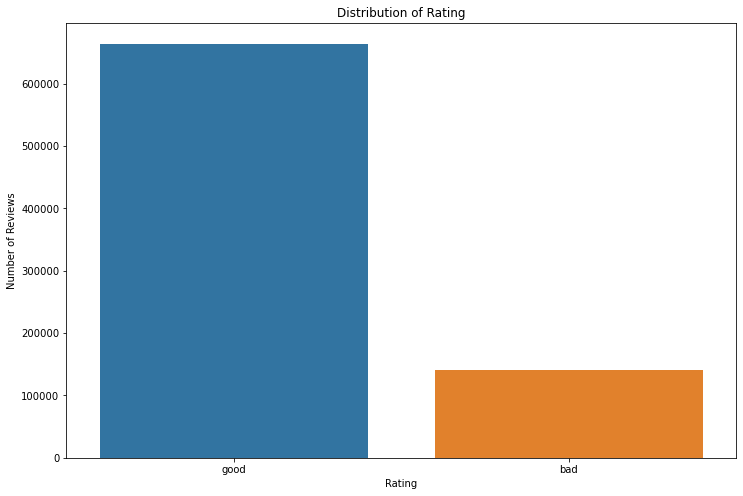

In [15]:
##########################################
# Reviewers totals for each rating class
##########################################
plt.figure(figsize=(12,8))
sns.countplot(whatsappData.rating_class)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

Bag of Words¶
Our goal is to classify the reviews into positive and negative sentiment. There are two main steps involved. First, we need to find a word embedding to convert a text into a numerical representation. Second, we fit the numerical representations of text to machine learning algorithms or deep learning architectures.

One common approach of word embedding is frequency based embedding such as Bag of Words (BoW) model. BoW model learns a vocubulary list from a given corpus and represents each document based on some counting methods of words. In this part, we will explore the model performance of using BoW with supervised learning algorithms. Here's the workflow in this part.

Step 1 : Preprocess raw reviews to cleaned reviews

Step 2 : Create BoW using CountVectorizer / Tfidfvectorizer in sklearn

Step 3 : Transform review text to numerical representations (feature vectors)

Step 4 : Fit feature vectors to supervised learning algorithm (eg. Naive Bayes, Logistic regression, etc.)

Step 5 : Improve the model performance by GridSearch

Text Preprocessing¶
The following text preprocessing are implemented to convert raw reviews to cleaned review, so that it will be easier for us to do feature extraction in the next step.


In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import unicodedata
import contractions
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer
import re, string

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jsaum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jsaum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jsaum\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
from contractions import contractions_dict
# calculate raw tokens in order to measure of cleaned tokens

In [18]:
from nltk.tokenize import word_tokenize
raw_tokens=len([w for t in (whatsappData["content"].apply(word_tokenize)) for w in t])
print('Number of raw tokens: {}'.format(raw_tokens))

Number of raw tokens: 3924742


Functions for Preprocessing¶
Expanding Contractions¶
Contractions are shortened version of words or syllables. They exist in either written or spoken forms. Shortened versions of existing words are created by removing specific letters and sounds. In case of English contractions, they are often created by removing one of the vowels from the word.

By nature, contractions do pose a problem for NLP and text analytics because, to start with, we have a special apostrophe character in the word. Ideally, we can have a proper mapping for contractions and their corresponding expansions and then use it to expand all the contractions in our text.

Removing Special Characters¶
One important task in text normalization involves removing unnecessary and special characters. These may be special symbols or even punctuation that occurs in sentences. This step is often performed before or after tokenization. The main reason for doing so is because often punctuation or special characters do not have much significance when we analyze the text and utilize it for extracting features or information based on NLP and ML.

Tokenizing Text¶
Tokenization can be defined as the process of breaking down or splitting textual data into smaller meaningful components called tokens.

Sentence tokenization is the process of splitting a text corpus into sentences that act as the first level of tokens which the corpus is comprised of. This is also known as sentence segmentation , because we try to segment the text into meaningful sentences.

Word tokenization is the process of splitting or segmenting sentences into their constituent words. A sentence is a collection of words, and with tokenization we essentially split a sentence into a list of words that can be used to reconstruct the sentence.

Removing Stopwords¶
Stopwords are words that have little or no significance. They are usually removed from text during processing so as to retain words having maximum significance and context. Stopwords are usually words that end up occurring the most if you aggregated any corpus of text based on singular tokens and checked their frequencies. Words like a, the , me , and so on are stopwords.

Correcting Words¶
One of the main challenges faced in text normalization is the presence of incorrect words in the text. The definition of incorrect here covers words that have spelling mistakes as well as words with several letters repeated that do not contribute much to its overall significance.

Correcting Repeating Characters
Correcting Spellings
Lemmatization¶
The process of lemmatization is to remove word affixes to get to a base form of the word. The base form is also known as the root word, or the lemma, will always be present in the dictionary.


In [73]:
def strip_html(text):
    try:
        soup = BeautifulSoup(text, "html.parser")
        return soup.get_text()
    except Exception as e:
        print("Exception found for strip_html: ",text)

        
def remove_between_square_brackets(text):
    try:
        return re.sub('\[[^]]*\]', '', text)
    except Exception as e:
        print("Exception found for remove_between_square_brackets: ",text)


def denoise_text(text):
    try:
        text = strip_html(text)
        text = remove_between_square_brackets(text)
        return text
    except Exception as e:
        print("Exception found for denoise_text: ",text)


# Define function to expand contractions
def expand_contractions(text):
    try:
        expanded_text = contractions.fix(text)
        return expanded_text
    except Exception as e:
        print("Exception found for expand_contractions: ",text)


# special_characters removal
def remove_special_characters(text, remove_digits=True):
    try:
        pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
        text = re.sub(pattern, '', text)
        return text
    except Exception as e:
        print("Exception to remove_special_characters: ",text)


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    try:
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        return new_words
    except Exception as e:
        print("Exception to remove_non_ascii: ",words)


def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    try:
        new_words = []
        for word in words:
            new_word = word.lower()
            new_words.append(new_word)
        return new_words
    except Exception as e:
        print("Exception to to_lowercase: ",words)



def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    try:
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_word = remove_special_characters(new_word, True)
                new_words.append(new_word)
        return new_words
    except Exception as e:
        print("Exception to remove_punctuation_and_splchars: ",words)


def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    try:
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words
    except Exception as e:
        print("Exception to replace_numbers: ",words)


stopword_list= stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    try:
        new_words = []
        for word in words:
            if word not in stopword_list:
                new_words.append(word)
        return new_words
    except Exception as e:
        print("Exception to remove_stopwords: ",words)


def stem_words(words):
    """Stem words in list of tokenized words"""
    try:
        stemmer = LancasterStemmer()
        stems = []
        for word in words:
            stem = stemmer.stem(word)
            stems.append(stem)
        return stems
    except Exception as e:
        print("Exception to stem_words: ",words)
    

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    try:
        lemmatizer = WordNetLemmatizer()
        lemmas = []
        for word in words:
            lemma = lemmatizer.lemmatize(word, pos='v')
            lemmas.append(lemma)
        return lemmas
    except Exception as e:
        print("Exception to lemmatize_verbs: ",words)
    

def normalize(words):
    try:
        words = remove_non_ascii(words)
        words = to_lowercase(words)
        words = remove_punctuation_and_splchars(words)
        words = remove_stopwords(words)
        return words
    except Exception as e:
        print("Exception to normalize: ",words)
    

def lemmatize(words):
    try:
        lemmas = lemmatize_verbs(words)
        return lemmas
    except Exception as e:
        print("Exception to lemmatize: ",words)
    

def normalize_and_lemmaize(input):
    try:
        sample = denoise_text(input)
        sample = expand_contractions(sample)
        sample = remove_special_characters(sample)
        words = nltk.word_tokenize(sample)
        words = normalize(words)
        lemmas = lemmatize(words)
        return ' '.join(lemmas)
    except Exception as e:
        print("Exception to normalize_and_lemmaize: ",input)

In [75]:
clean_text = whatsappData['content'].map(lambda text: normalize_and_lemmaize(text))

Exception found for expand_contractions:  Adİm mEhmEt ÖzbEk, uygUlaMayı 1971 tariHinDe 25:00 dA indirDim, kŞisel BilgiLerİnimiN kuLlanıLmasIna İzniNiz YoktUr, kullAnıldığınDa BoDruM kaTıma'a daVa sürEci BaşLatırIm.
Exception to remove_special_characters:  None
Exception to normalize_and_lemmaize:  Adİm mEhmEt ÖzbEk, uygUlaMayı 1971 tariHinDe 25:00 dA indirDim, kŞisel BilgiLerİnimiN kuLlanıLmasIna İzniNiz YoktUr, kullAnıldığınDa BoDruM kaTıma'a daVa sürEci BaşLatırIm.
Exception found for expand_contractions:  İt's very basic program as well as chat Storage is very big problem When you delete something the main document also deleted. When delete message sth is remain. Grup participants are limited. There is no chanel system
Exception to remove_special_characters:  None
Exception to normalize_and_lemmaize:  İt's very basic program as well as chat Storage is very big problem When you delete something the main document also deleted. When delete message sth is remain. Grup participants are l

In [78]:
whatsappData['clean_text'] = clean_text

In [79]:
whatsappData.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,rating_class,clean_text
0,Charles Ojegbulu,Awesome,5,0,2.22.13.76,8/2/2022 17:00,good,awesome
1,Linet Kendi,It was the best,5,0,2.22.3.77,8/2/2022 17:00,good,best
2,Veronica James,Is so beautiful whatsapp,5,0,2.22.9.78,8/2/2022 17:00,good,beautiful whatsapp
3,Ggbeko Shigmah,It really helpful and fast,5,0,NaN,8/2/2022 17:00,good,really helpful fast
4,Rudra Awasthi,Very useful for us no another words,5,0,2.22.15.74,8/2/2022 17:00,good,useful us no another word


### Cleaning the text

In [84]:
# Let's put aside number of raw tokens in order to measure of cleaned tokens

from nltk.tokenize import word_tokenize

#clean_tokens=len([w for t in (whatsappData["clean_text"].apply(word_tokenize)) for w in t])

#print('Number of clean tokens: {}\n'.format(clean_tokens))
#print('Percentage of removed tokens: {0:.2f}'.format(1-(clean_tokens/raw_tokens)))

clean_tokens = []
for text in whatsappData["clean_text"]:
    try:
        clean_tokens.append(word_tokenize(text))
    except Exception as e:
        print("Exception in word_tokenize: ", text)
        
print('Number of clean tokens: {}\n'.format(len(clean_tokens)))
print('Percentage of removed tokens: {0:.2f}'.format(1-(len(clean_tokens)/raw_tokens)))


Exception in word_tokenize:  None
Exception in word_tokenize:  None
Number of clean tokens: 804712

Percentage of removed tokens: 0.79
